In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
data = pd.read_csv('complete_dataset_cleaned.csv')
data=data.iloc[:,:-2]
data.pop('Pkey')
data.pop('date')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data.head()

,continent,location,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Africa,Algeria,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.403
1,Africa,Algeria,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.517
2,Africa,Algeria,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.449
3,Africa,Algeria,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.268
4,Africa,Algeria,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,1.154


In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [3]:
data=data[data.location!='Bolivia']
data=data[data.location!='Luxembourg']

index=data.iloc[:,1]

In [4]:
index

0              Algeria
1              Algeria
2              Algeria
3              Algeria
4              Algeria
             ...      
28366    United States
28367    United States
28368    United States
28369    United States
28370    United States
Name: location, Length: 26896, dtype: object

In [5]:
#data=clean_dataset(data.iloc[:,1:])

In [6]:
data=data.iloc[:,2:]

In [7]:
#data.dropna()

In [8]:
data

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,13.423,0.113,1.20,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,13.604,0.249,1.18,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,13.740,0.204,1.15,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,13.287,0.294,1.14,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,13.446,0.249,1.13,0.0,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28366,217.809,1.166,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.875
28367,22.659,0.139,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.772
28368,14.905,0.012,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.852
28369,64.914,0.347,0.86,0.0,25.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,7.855


In [9]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [10]:
count=1

In [11]:
import warnings
warnings.filterwarnings('ignore') # 
kmean_avg_dist, gmm_avg_dist= [],[]


In [12]:
from sklearn.base import warnings
while (count<10): 
 count=count+1
 #training k-means model
 kmeans = KMeans(n_clusters=count)
 kmeans.fit(X,y)
 #predictions from kmeans
 pred = kmeans.predict(X)
 frame = pd.DataFrame(X)
 # training gaussian mixture model 
 gmm = GaussianMixture(n_components=count)
 gmm.fit(X,y)
 #predictions from gmm
 labels = gmm.predict(X)
 frame = pd.DataFrame(X)
 score_GMM=metrics.silhouette_score(X,labels)
 score_Kmeans= metrics.silhouette_score(X,pred)
 kmean_avg_dist.append(kmeans.inertia_)
 rand_Kmeans=metrics.cluster.adjusted_rand_score(y,pred)
 rand_gmm=metrics.cluster.adjusted_rand_score(y,labels)
 print("Rand score for",count,"clusters Kmeans:",rand_Kmeans,"GMM:",rand_gmm)
 print("Silhouette score for",count,"clusters Kmeans:",score_Kmeans,"GMM:",score_GMM)


Rand score for 2 clusters Kmeans: 0.00042745580700346967 GMM: 0.0004297453011349868
Silhouette score for 2 clusters Kmeans: 0.5751385427689136 GMM: 0.4758466373084356
Rand score for 3 clusters Kmeans: 0.0008403786867468857 GMM: 0.0008461233489498098
Silhouette score for 3 clusters Kmeans: 0.6167244016630191 GMM: 0.6178906376104432
Rand score for 4 clusters Kmeans: 0.00117333281321015 GMM: 0.0011735330726626817
Silhouette score for 4 clusters Kmeans: 0.646604150316168 GMM: 0.6430887916467086
Rand score for 5 clusters Kmeans: 0.0017693252910165754 GMM: 0.001386963439502296
Silhouette score for 5 clusters Kmeans: 0.6060547372056396 GMM: 0.5851273913414055
Rand score for 6 clusters Kmeans: 0.0020518866959231556 GMM: 0.002239587775202989
Silhouette score for 6 clusters Kmeans: 0.6180521606906695 GMM: 0.5941292470068437
Rand score for 7 clusters Kmeans: 0.0025889093792298696 GMM: 0.0023107478495606095
Silhouette score for 7 clusters Kmeans: 0.6138065990512672 GMM: 0.6041422655400274
Rand sco

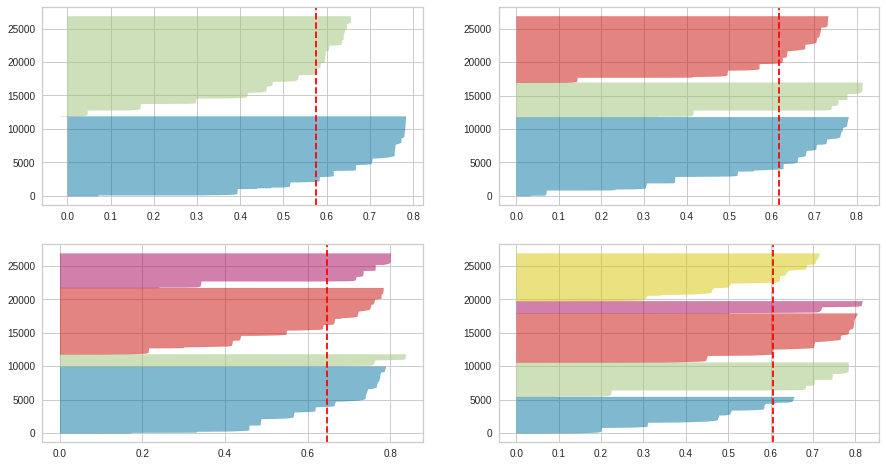

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

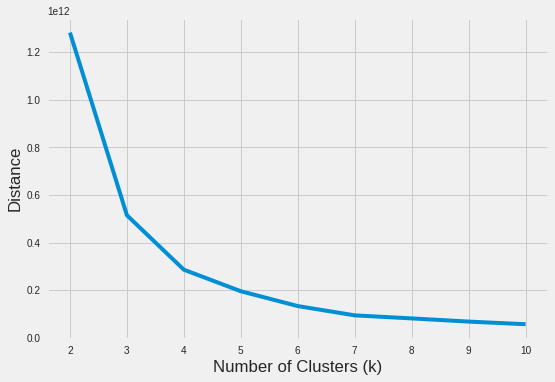

In [14]:
range_n_clusters=[2,3,4,5,6,7,8,9,10]
import matplotlib.style as style
style.use("fivethirtyeight")
plt.plot(range_n_clusters, kmean_avg_dist)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

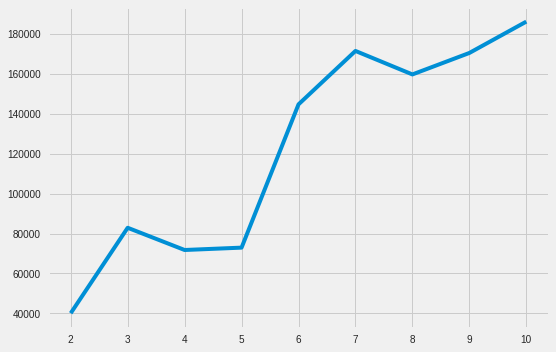

In [15]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = GaussianMixture(n_components=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

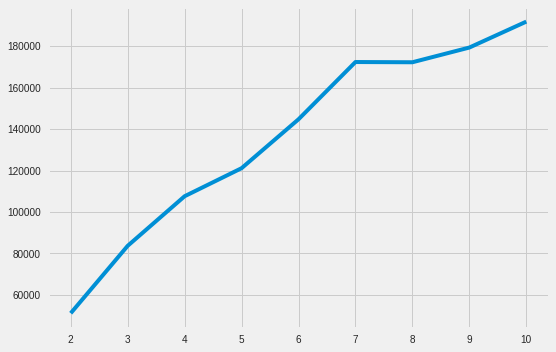

In [16]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = KMeans(n_clusters=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X,y)
#predictions from kmeans
pred = kmeans.predict(X)
gmm=GaussianMixture(n_components=4)
gmm.fit(X,y)
#predictions from gmm
labels = gmm.predict(X)
cluster=pd.DataFrame(data={'country':index,'Kmeans':pred,'GMM':labels})
cluster

,country,Kmeans,GMM
0,Algeria,1,0
1,Algeria,1,0
2,Algeria,1,0
3,Algeria,1,0
4,Algeria,1,0
...,...,...,...
28366,United States,0,2
28367,United States,0,2
28368,United States,0,2
28369,United States,0,2


In [18]:
from numpy.ma.extras import average

cluster=cluster.groupby('country').mean()

In [19]:
cluster

,Kmeans,GMM
country,,
Algeria,1.0,0.0
Argentina,1.0,0.0
Australia,2.0,1.0
Austria,2.0,1.0
Belgium,2.0,1.0
Bulgaria,1.0,0.0
Canada,2.0,1.0
Chile,1.0,0.0
Cyprus,3.0,3.0


In [20]:
print(cluster.GMM==1)

country
Algeria           False
Argentina         False
Australia          True
Austria            True
Belgium            True
Bulgaria          False
Canada             True
Chile             False
Cyprus            False
Czechia           False
Denmark            True
Estonia           False
Finland            True
France             True
Germany            True
Iceland            True
Ireland           False
Israel            False
Italy             False
Japan             False
Latvia            False
Malaysia          False
Malta             False
Netherlands        True
Portugal          False
Romania           False
Serbia            False
Slovakia          False
Slovenia          False
South Africa      False
South Korea       False
Spain             False
Sweden             True
Switzerland       False
United Kingdom     True
United States     False
Name: GMM, dtype: bool


In [21]:
from PIL import Image
Image.open('MapChart_Map.png')


Output hidden; open in https://colab.research.google.com to view.

In [22]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')

In [23]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210475,Zimbabwe44842,Africa,Zimbabwe,10/8/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210476,Zimbabwe44843,Africa,Zimbabwe,10/9/2022,0.000,0.0,NaN,76.42,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210477,Zimbabwe44844,Africa,Zimbabwe,10/10/2022,5.877,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
210478,Zimbabwe44845,Africa,Zimbabwe,10/11/2022,0.000,0.0,NaN,NaN,NaN,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [24]:
data2=unclean_data.groupby('location').mean()

In [25]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

In [26]:
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
location,,,,,,,,,,,,,,
Afghanistan,5.214554,0.208511,1.063653,11.989079,31.742777,54.422,1803.987,597.029,9.59,NaN,NaN,0.50,64.83,NaN
Albania,122.883366,1.329693,1.040174,46.112985,48.009245,104.871,11803.431,304.195,10.08,7.1,51.2,2.89,78.57,NaN
Algeria,6.376680,0.164828,1.003690,24.122857,60.078759,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,0.499116
Andorra,614.302520,2.126884,0.893998,102.127818,37.924314,163.755,NaN,109.135,7.97,29.0,37.8,0.00,83.73,NaN
Angola,3.189961,0.060064,0.837355,25.264103,58.486120,23.890,5819.495,276.045,3.94,NaN,NaN,0.00,61.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,90.402084,1.054375,NaN,85.564444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,79.94,NaN
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,70.26,NaN
Yemen,0.395666,0.073016,0.774292,1.849394,30.292464,53.508,1479.147,495.003,5.35,7.6,29.2,0.70,66.12,NaN


In [45]:
Ind=pd.DataFrame(data2[data2.index=='France'])

In [46]:
Ind=Ind.iloc[:,:-1]

In [47]:
Ind

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
France,552.669481,2.402207,1.09473,138.562772,45.96432,122.578,38605.671,86.06,4.77,30.1,35.6,5.98,82.66


In [48]:
ind=gmm.predict(Ind)

In [49]:
ind

array([1])

In [63]:
sf=[]
for i in X.columns:
  k=KMeans(n_clusters=4)
  d= X[[i]]
  k.fit(d,y)
  pred=k.predict(d)
  s=metrics.silhouette_score(d,pred)
  print("Score for",i,":",s)


Score for new_cases_per_million : 0.7590867631170382
Score for new_deaths_per_million : 0.6890819543858658
Score for reproduction_rate : 0.530082847473688
Score for total_vaccinations_per_hundred : 0.7696199004282613
Score for stringency_index : 0.5768521807141953
Score for population_density : 0.6654110332048884
Score for gdp_per_capita : 0.6672019286567029
Score for cardiovasc_death_rate : 0.6641256731113906
Score for diabetes_prevalence : 0.6664831491904408
Score for female_smokers : 0.6023656224342152
Score for male_smokers : 0.6357665908827352
Score for hospital_beds_per_thousand : 0.7003064312057742
Score for life_expectancy : 0.6130814928524149


In [67]:
sf=X.iloc[:,[0,1,3,5,6,7,8,11]]
sf

,new_cases_per_million,new_deaths_per_million,total_vaccinations_per_hundred,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand
0,13.423,0.113,0.0,17.348,13913.839,278.364,6.73,1.90
1,13.604,0.249,0.0,17.348,13913.839,278.364,6.73,1.90
2,13.740,0.204,0.0,17.348,13913.839,278.364,6.73,1.90
3,13.287,0.294,0.0,17.348,13913.839,278.364,6.73,1.90
4,13.446,0.249,0.0,17.348,13913.839,278.364,6.73,1.90
...,...,...,...,...,...,...,...,...
28366,217.809,1.166,0.0,35.608,54225.446,151.089,10.79,2.77
28367,22.659,0.139,0.0,35.608,54225.446,151.089,10.79,2.77
28368,14.905,0.012,0.0,35.608,54225.446,151.089,10.79,2.77
28369,64.914,0.347,0.0,35.608,54225.446,151.089,10.79,2.77
